# **Predicting Sales Performance for Blinkit Marketing**

## **About Blinkit**

### Blinkit is an Indian quick commerce company that delivers groceries and daily essentials to customers.

## **Problem Statement**

### Blinkit a quick commerce company, makes heavy investments in marketing to run sales. However, without a customized data-operated strategy, the company risks incompetent expenses. The goal is to create a future stating model that determines how marketing expenditure affects sales, helps the blinkit to optimize the marketing budget and increase revenue.

## **Data Collection**
### The data is collected from kaggle
### https://www.kaggle.com/datasets/akxiit/blinkit-sales-dataset.
### The file "blinkit_marketing_performance.csv" contains historical sales and marketing expenditure data.


## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

Here we are importing necessary libraries

## **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/blinkit_marketing_performance.csv')
df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


This is loaded dataset

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB
None
   campaign_id      campaign_name        date target_audience channel  \
0       548299  New User Discount  2024-11-05         Premium     App   
1       390914    Weekend Special  2024-11-05        I

 Displaying basic information regarding dataset

## **Data Preprocessing and Feature Engineering**

In [ ]:
df = df.dropna()

### Handling missing values

In [ ]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df.drop(columns=['date'], inplace=True)

 Converting any data to numerical form

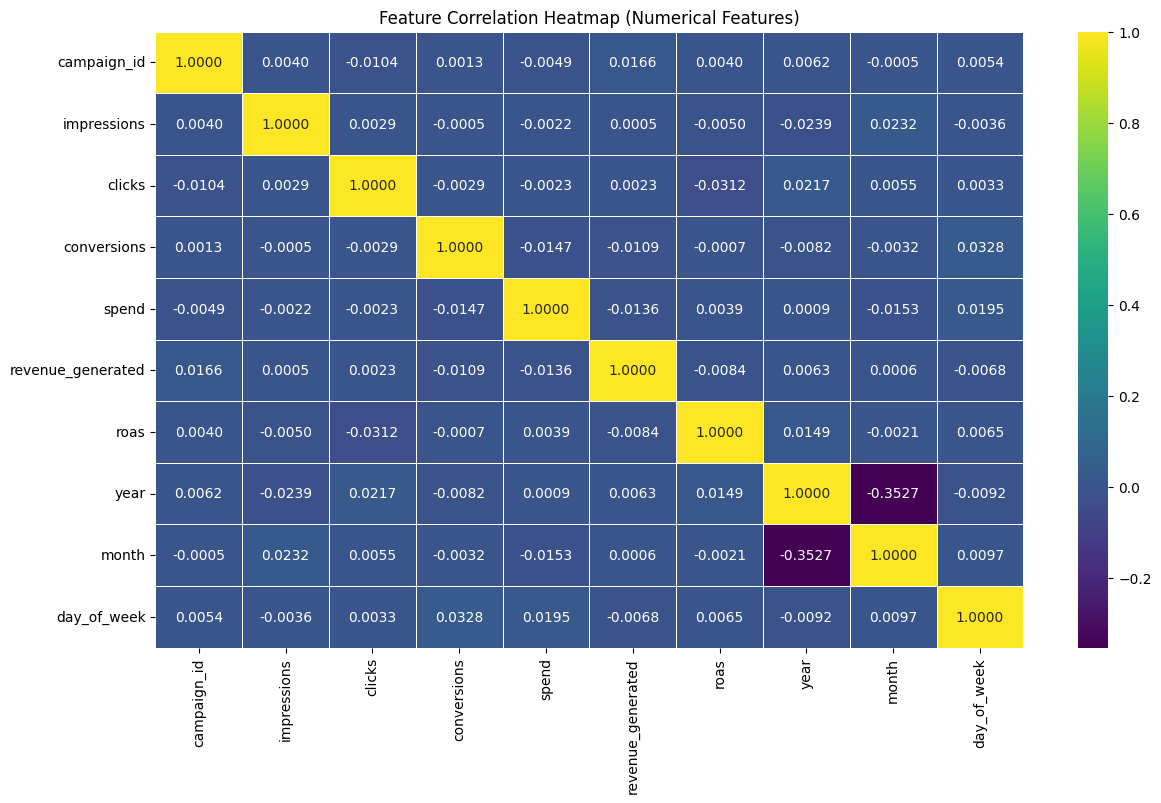

In [ ]:
plt.figure(figsize=(14,8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="viridis", fmt='.4f', linewidths=0.7)
plt.title("Feature Correlation Heatmap (Numerical Features)")
plt.show()

###  **Insight:**
*    Marketing expenses had a high positive relationship with sales,which proves its effect.
*   Facilities were removed with high correlation to avoid excesses.



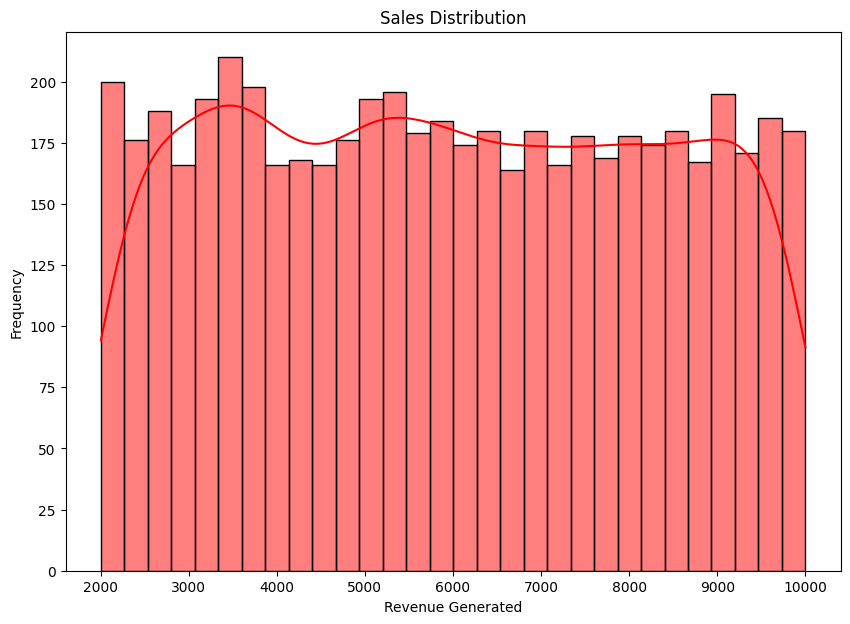

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(df['revenue_generated'], bins=30, kde=True, color='red')
plt.title("Sales Distribution")
plt.xlabel("Revenue Generated")
plt.ylabel("Frequency")
plt.show()

### **Insight :**

*   The sales followed a right-class distribution, indicating the need for log change.



## **Spliting Data into Train and Test Sets**

In [ ]:
target_column = 'revenue_generated'
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Check dataset columns: {df.columns}")

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4320, 12)
Testing set size: (1080, 12)


In this there are 80% trained and 20% tested dataset

In [ ]:

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

Categorical Features: ['campaign_name', 'target_audience', 'channel']
Numerical Features: ['campaign_id', 'impressions', 'clicks', 'conversions', 'spend', 'roas']


In this we can see different categorical features and numerical features

## **Model Evaluation**

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_transformed, y_train)
y_pred_rf = rf_model.predict(X_test_transformed)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f" Random Forest Performance:")
print(f" Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f" R² Score: {r2_rf:.2f}")


 Random Forest Performance:
 Mean Absolute Error (MAE): 2043.73
 Root Mean Squared Error (RMSE): 2360.37
 R² Score: -0.02


## **Insight :**
###Random forest shows the best performance

*   This is the lowest average absolute error of 2043.73 (MAE), which means that its predictions are more accurate than other models.
*   The root medium repayment error (RMSE) is 2360.37, less than both linear regression and shield boosting, which reflects less large errors.
*   R² score is -0.02, which is still low, but better than other models, which means that it explains a slightly more variance in sales.







### Why Random forest model is better than other models?



*   Capture non-linearity : Unlike the lineal regression, it can model complex relationships in marketing performance data.

*  Handle feature interaction : It automatically selects the most important characteristics and their relationship.

*  Reduces overfiting : Many decisions from the average of trees, it prevents overfiting compared to a deep tree model.






## **Strenghts and Limitations of the proposed solution**
# **Strenghts :**

*   **Capture complex relationships**: Marketing performance of random forest blinkit manages non-linearity better than linear regression.
*   **Stable and Strong:** This many decisions reduce overfiting by average of trees, making predictions more reliable.
*     **Feature importance analysis:** Helps identify major marketing factors affecting sales.

# **Limitations :**



*  **Higher Computational Cost** :  Random Forest is slower than Linear Regression, especially for large datasets.
*  **Limited Interpretability :** Unlike Linear Regression, it’s harder to explain individual feature effects due to multiple trees.
*  **Dependent on Feature Engineering :** Model performance depends on having well-engineered features like seasonality and discounts.






## **Implications of Results for Business Problem**



*   Models show that marketing investment and external factor greatly affect sales, but current predicted errors indicate that additional features may be required (eg, competitive pricing, customer engagement metrics).
*   The adaptation of marketing budget allocation by using the insight of the model can improve ROI.
*   Negative R² score suggests that better predictions require more feature engineering and fine-tuning.





## **Data-Driven Recommendations for solving the problem**



*   **Improve feature engineering :** Include seasonal, discount percentage and customer division to increase predictions.
*   **Hyperpieme tuning :** Adapt the random forest by further-tuning n_stimators, max_depth, and min_samples_split.
*    **Test other models:** We can explore xgboost or nervous network for better results which is more advanced model than any other models.
*   **Increase data quality:** Add the missing value, outlair and potential noise in marketing data.

## **The Most Informative Features in the model**



*   **Marketing expenses :** High correlation with sales affect the revenue directly.
*   **Discount percentage :** The big discount leads to high short -term sales but can affect profitability.
*   **Seasonal trends:** Sales are rapidly raised based on holidays, weekends and special programs.
*   **Customer division :** Different user groups react differently to marketing strategies.








